# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [2]:
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("legend", fontsize="small")
plt.rc("axes", labelsize="small")

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [6]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/3_landmarks_reward2



centralized  independent  naming_game_30msg


ls: cannot access '/gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/centralized/all/modified_reward/6_landmarks/naming_game': No such file or directory


In [9]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/6_landmarks

25align      independent		naming_game_30msg_alpha05_temp15
50align      naming_game		naming_game_30msg_t30_a10
75align      naming_game_20msg_t30_a10
centralized  naming_game_2_steps


In [3]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10","naming_game_30msg_alpha05_temp15"]

In [4]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","25align","75align","naming_game_30msg_t30_a10"]

In [86]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["naming_game_30msg_t30_a10"]

In [15]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/3_landmarks

25align      independent		       naming_game_30msg_t30_a10
50align      naming_game_30msg_alpha05_temp15  naming_game_9msg_t30_a10
75align      naming_game_30msg_alpha05_temp30  naming_game_t15_a10
centralized  naming_game_30msg_alpha10_temp30  naming_game_t30_a10


In [16]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_t30_a10","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha10_temp30"]

In [5]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks_reward4/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30"]

In [20]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/3_landmarks

50align      naming_game_30msg_alpha05_temp15
centralized  naming_game_30msg_alpha05_temp30
independent  naming_game_30msg_alpha10_temp30b


In [21]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha10_temp30b"]

In [3]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30b"]

In [75]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/6_landmarks

50align				  naming_game_30msg_alpha05_temp30
centralized			  naming_game_30msg_alpha05_temp30b
independent			  naming_game_30msg_alpha10_temp30b
naming_game_30msg_alpha05_temp15


In [51]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha05_temp30","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha05_temp30b","naming_game_30msg_alpha10_temp30b"]

In [12]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","50align","naming_game_30msg_alpha10_temp30b"]

In [20]:
experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","naming_game_30msg_alpha10_temp30b"]

In [19]:
!ls $SCRATCH/elias_expe/2_agents/all/modified_reward/6_landmarks

50align				  naming_game_30msg_alpha05_temp30
centralized			  naming_game_30msg_alpha05_temp30b
independent			  naming_game_30msg_alpha10_temp30b
naming_game_30msg_alpha05_temp15


In [101]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/"
list_of_experiments = ["centralized","naming_game_30msg_alpha05_temp15","naming_game_30msg_alpha10_temp30b"]

In [24]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/"
list_of_experiments = ["centralized","naming_game_30msg_alpha10_temp30","naming_game_30msg_alpha05_temp30","50align","25align","75align"]

In [107]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks_reward8/"
list_of_experiments = ["centralized","naming_game_30msg"]

In [97]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks_reward4_nodec/"
list_of_experiments = ["naming_game_30msg"]

In [25]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
                        #if(ctr==5):
                        #    print(dump["custom_metrics"].keys())
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["episode_reward_mean"])

                        metrics = dump.get("evaluation")
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            r.append(metrics["episode_reward_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-25_16-00-518o3o50rr
2022-10-25_16-00-159fewsxsl
2022-10-25_16-00-51_1nit794
2022-10-25_16-00-15c7r26f63
2022-10-25_16-00-51gkhmkea0
2022-10-26_12-23-36tnspdchd
2022-10-26_12-23-36y1qela3f
2022-10-26_12-23-361jzdlx2z
2022-10-26_12-23-36pt_blwdm
2022-10-26_12-23-36xdrwb902
2022-10-25_15-53-04h1gdpbk7
2022-10-25_15-53-04emoedqvd
2022-10-25_15-53-04m1hbq3dy
2022-10-25_15-53-032ts0ry0p
2022-10-25_15-53-0426yb89yr
2022-10-26_22-37-074duhqlmb
2022-10-26_22-37-10pmdoqrwi
2022-10-26_22-37-11jnmvgil6
2022-10-26_22-37-10i29_9g0t
2022-10-26_22-37-12aq1w9cnx
2022-10-26_22-40-40t08oc2ue
2022-10-26_22-40-39hpqcivx9
2022-10-26_22-41-31qv1beaws
2022-10-26_22-40-40qrk_1f73
2022-10-26_22-41-318c7rd_n0
2022-10-26_22-38-3084tfdei1
2022-10-26_22-38-3152ofvvgz
2022-10-26_22-38-313i7pgr66
2022-10-26_22-38-30m80gq164
2022-10-26_22-38-30_gd0s8ru


In [10]:
main="naming_game_30msg"

Training plots

NameError: name 'main' is not defined

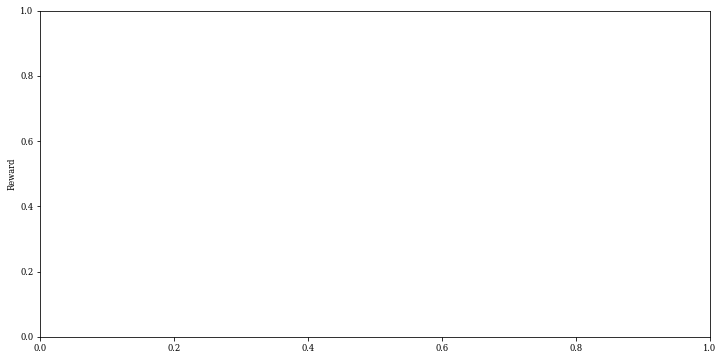

In [6]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)


        
for label, result in results.items():
    if( label!=main):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
            result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
            result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1
for label, result in results.items():
    if( label==main):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice],alpha=0.4,label=label)
   
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice],alpha=0.4)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

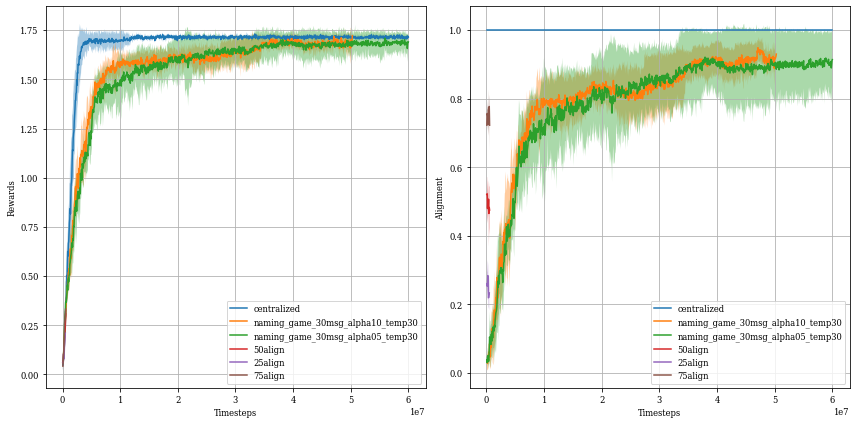

In [26]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Eval plots

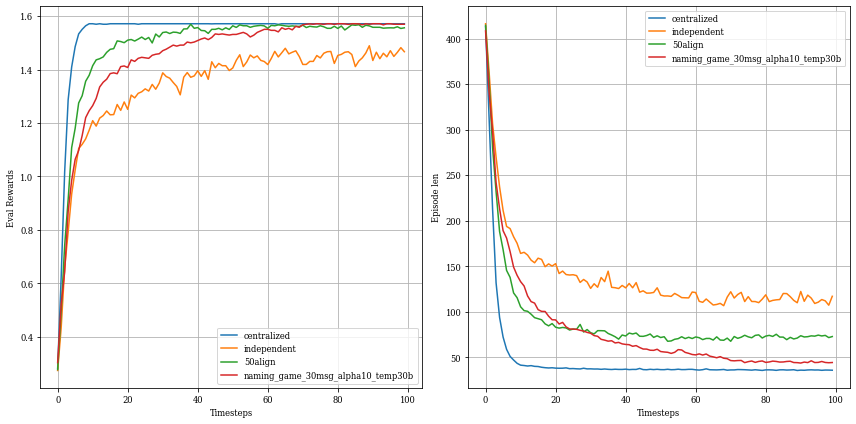

In [16]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")

slice=100
i = 1
n_exp = len(results)

        
for label, result in results.items():
    if(label!=main):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice].mean(axis=1), label=label)
     
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Eval Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice].mean(axis=1), label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Episode len")
        i += 1
for label, result in results.items():
    if(label==main):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

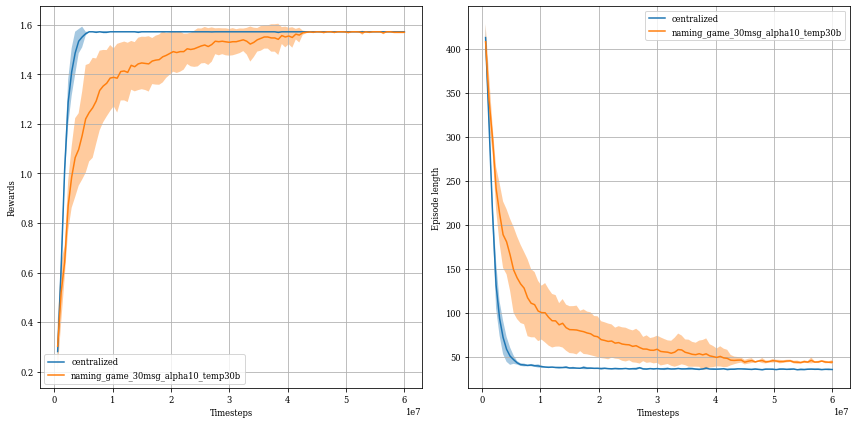

In [23]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for collective 

In [159]:

subdir=os.environ["SCRATCH"]+"/elias_expe/2_agents/all/modified_reward/3_landmarks/naming_game_30msg_alpha05_temp15"
for j, experiment_name in enumerate(os.listdir(subdir)):
    if(os.path.isdir(subdir+"/"+experiment_name)):
        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

for result in result_raw:
    dump = json.loads(result)
print(dump["custom_metrics"].keys())

dict_keys(['reward for goal 011_mean', 'reward for goal 011_min', 'reward for goal 011_max', 'goal_alignment_mean', 'goal_alignment_min', 'goal_alignment_max', 'reward for collective goal_mean', 'reward for collective goal_min', 'reward for collective goal_max', 'reward for goal 101_mean', 'reward for goal 101_min', 'reward for goal 101_max', 'reward for goal 110_mean', 'reward for goal 110_min', 'reward for goal 110_max', 'reward for goal 100_mean', 'reward for goal 100_min', 'reward for goal 100_max', 'reward for individual goal_mean', 'reward for individual goal_min', 'reward for individual goal_max', 'reward for goal 010_mean', 'reward for goal 010_min', 'reward for goal 010_max', 'reward for goal 001_mean', 'reward for goal 001_min', 'reward for goal 001_max'])


In [160]:
print(dump["evaluation"]["custom_metrics"].keys())

dict_keys(['reward for goal 001_mean', 'reward for goal 001_min', 'reward for goal 001_max', 'reward for individual goal_mean', 'reward for individual goal_min', 'reward for individual goal_max', 'reward for goal 010_mean', 'reward for goal 010_min', 'reward for goal 010_max', 'reward for goal 100_mean', 'reward for goal 100_min', 'reward for goal 100_max', 'reward for goal 011_mean', 'reward for goal 011_min', 'reward for goal 011_max', 'goal_alignment_mean', 'goal_alignment_min', 'goal_alignment_max', 'reward for collective goal_mean', 'reward for collective goal_min', 'reward for collective goal_max', 'reward for goal 101_mean', 'reward for goal 101_min', 'reward for goal 101_max', 'reward for goal 110_mean', 'reward for goal 110_min', 'reward for goal 110_max'])


In [18]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for collective goal_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for collective goal_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-24_15-52-040lrgefc2
2022-10-24_15-52-04640t2fqh
2022-10-24_15-52-040_r0lo4z
2022-10-24_15-51-13ewx4dsxz
2022-10-24_15-52-04q68zrxcg
2022-10-24_15-53-072421hbly
2022-10-24_15-54-39op_8rg6e
2022-10-24_15-53-07_cmtn8s1
2022-10-24_15-54-396xxvn__9
2022-10-24_15-54-39sjxqo5u3
2022-10-24_15-55-504bt9gxhu
2022-10-24_15-55-50dpwyb64_
2022-10-24_15-56-291zg9aarl
2022-10-24_15-56-29aak52qce
2022-10-24_15-55-50s81agzpa
2022-10-25_22-07-369e50deqs
2022-10-25_22-07-3606x7jyz3
2022-10-25_22-07-36nrhqi86q
2022-10-25_22-07-33e3kaf119
2022-10-25_22-07-44fppth2yq


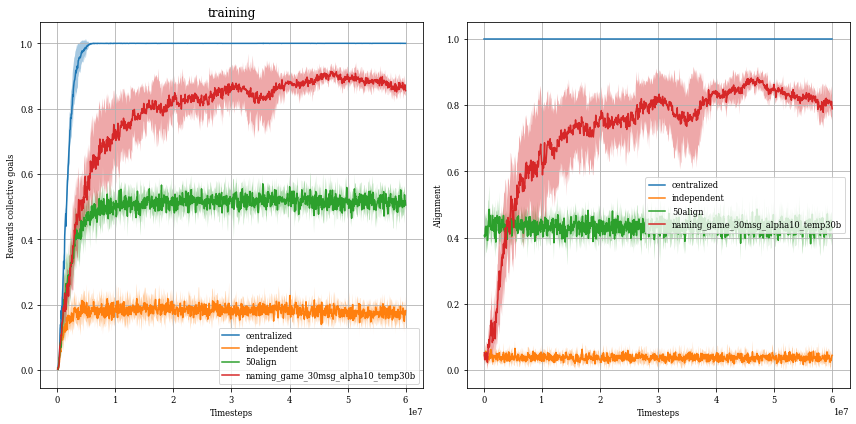

In [19]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards collective goals")
        plt.title("training")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

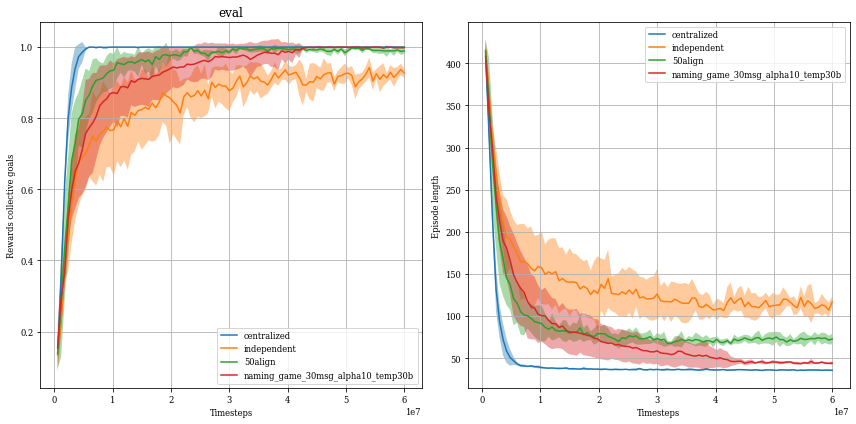

In [20]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")
        plt.ylabel("Rewards collective goals")
        plt.title("eval")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for individual

In [55]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for individual goal_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for individual goal_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-17_16-01-16s4p4yg8u


KeyError: 'reward for individual goal_mean'

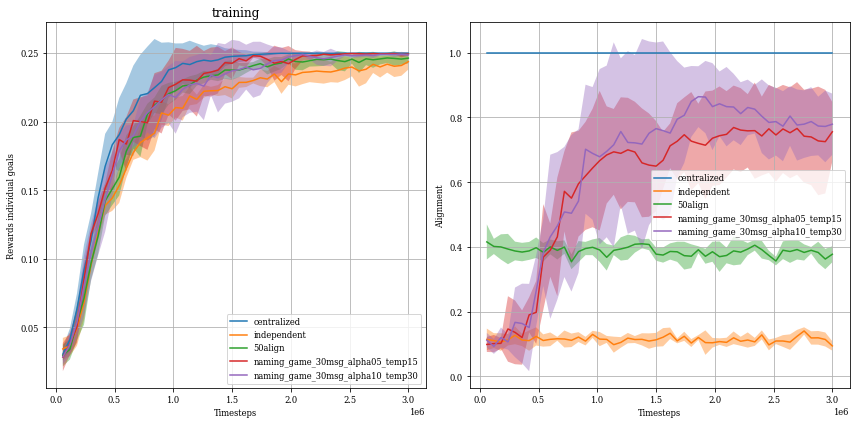

In [146]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=50

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards individual goals")
        plt.title("training")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

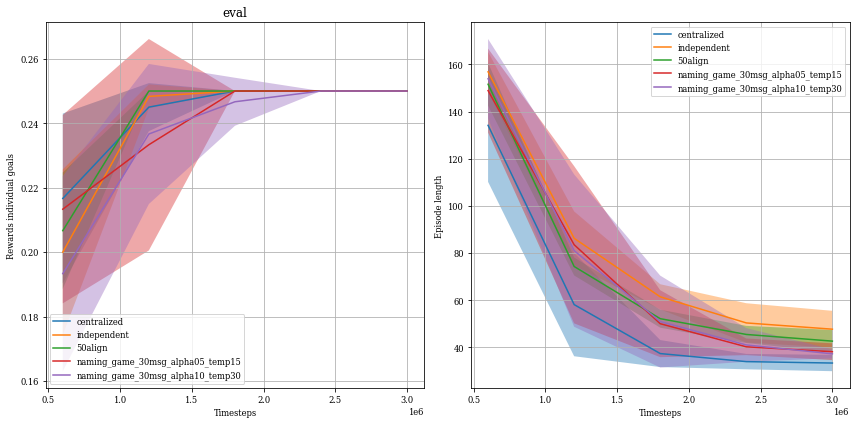

In [142]:
plt.figure(figsize=(12, 6))
slice=5
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards individual goals")
        plt.title("eval")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# reward for specific goal

In [24]:
goal="000001"



In [25]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
     
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["custom_metrics"]["reward for goal "+goal+"_mean"])

                        metrics = dump.get("evaluation")
                        
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            
                            r.append(custom["reward for goal "+goal+"_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-24_15-52-040lrgefc2
2022-10-24_15-52-04640t2fqh
2022-10-24_15-52-040_r0lo4z
2022-10-24_15-51-13ewx4dsxz
2022-10-24_15-52-04q68zrxcg
2022-10-24_15-53-072421hbly
2022-10-24_15-54-39op_8rg6e
2022-10-24_15-53-07_cmtn8s1
2022-10-24_15-54-396xxvn__9
2022-10-24_15-54-39sjxqo5u3
2022-10-24_15-55-504bt9gxhu
2022-10-24_15-55-50dpwyb64_
2022-10-24_15-56-291zg9aarl
2022-10-24_15-56-29aak52qce
2022-10-24_15-55-50s81agzpa
2022-10-25_22-07-369e50deqs
2022-10-25_22-07-3606x7jyz3
2022-10-25_22-07-36nrhqi86q
2022-10-25_22-07-33e3kaf119
2022-10-25_22-07-44fppth2yq


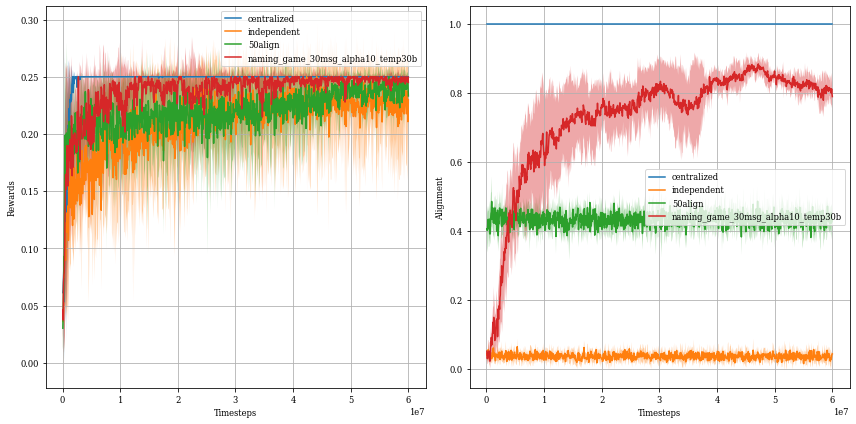

In [26]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

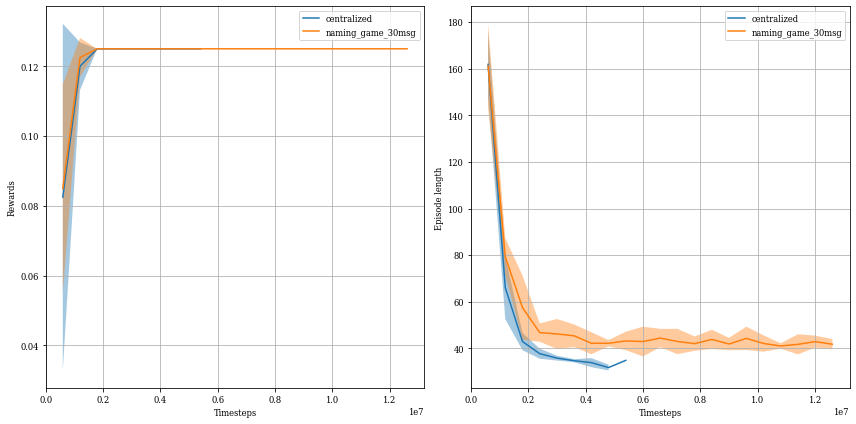

In [112]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

# alignement progress correlation

In [129]:
import os
import random
import tempfile
from copy import deepcopy
from datetime import datetime

import click
import imgc_marl.envs.population as population
import numpy as np
import yaml
from imgc_marl.callbacks import (
    PopGoalLinesCallback,
    PopGoalLinesCommunicationCallback,
    PopGoalLinesNamingCallback,
    PopGoalLinesNamingCallback1Matrix,
)
from imgc_marl.evaluation import (
    communication_custom_eval_function,
    custom_eval_function,
)
from imgc_marl.models.basic_communication import BasicCommunicationNetwork
from imgc_marl.models.full_naming_game import FullNamingNetwork
from imgc_marl.models.full_naming_game_single_matrix import FullNamingNetwork1Matrix
from imgc_marl.policies.basic_communication import BasicCommunicationTrainer
from imgc_marl.policies.full_naming_game import FullNamingTrainer
from imgc_marl.policies.full_naming_game_single_matrix import FullNamingTrainer1Matrix
from imgc_marl.utils import keep_relevant_results
from ray.rllib.agents.ppo import DEFAULT_CONFIG, PPOTrainer
from ray.rllib.models import ModelCatalog
from ray.rllib.policy.policy import PolicySpec
from ray.tune.logger import UnifiedLogger, pretty_print
import torch
import matplotlib.pyplot as plt
import moviepy

In [130]:
from imgc_marl.envs.population import PopGoalLinesEnv, PopLargeGoalLinesEnv

# 3 landmarks
#config_file = "goal_lines_naming.yml"
config_file="large_goal_lines_2agents_naming_game_all_modified.yml"
environment = PopLargeGoalLinesEnv

In [131]:
with open(f"../scripts/configs/{config_file}", "r") as f:
    user_config = yaml.safe_load(f)
# General settings of the algorithm
config = deepcopy(DEFAULT_CONFIG)
config["num_workers"] = 0
config["framework"] = "torch"
use_communication = user_config.get("communication", False)

config["horizon"] = 300
config["rollout_fragment_length"] = config["horizon"]
config["env_config"] = user_config["env_config"]
config["train_batch_size"] = 60_000
config["sgd_minibatch_size"] = 10_000
config["lambda"] = 0.9
config["lr"] = 0.0003


nb_msg= 30

def policy_mapping_fn(agent_id):
    return agent_id


config["multiagent"] = {
    "policies": {
        f"agent_{i}": PolicySpec(
            policy_class=None, observation_space=None, action_space=None
        )
        for i in range(config["env_config"]["population_size"])
    },
    "policy_mapping_fn": policy_mapping_fn,
}

train_env = environment

ModelCatalog.register_custom_model("FullNamingNetwork1Matrix", FullNamingNetwork1Matrix)
number_of_goals = environment(config["env_config"]).goal_space_dim
config["model"] = {
    "custom_model": "FullNamingNetwork1Matrix",
    "custom_model_config": {
        "number_of_goals": number_of_goals,
        "train_matrix": user_config.get("train_matrix", False),
        "nb_msg":nb_msg,
    },
}
trainer = FullNamingTrainer1Matrix(
    config=config,
    env=train_env,
)

2022-10-26 19:01:06,114	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-26 19:01:06,114	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-26 19:01:06,115	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-26 19:01:06,115	WARNING multi_agent_env.py:193 -- action_space_sample() has not been implemented
2022-10-26 19:01:06,117	WARNING multi_agent_env.py:137 -- observation_space_contains() has not been implemented
2022-10-26 19:01:06,124	WARNING catalog.py:628 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2022-10-26 19:01:06,147	WARNING catalog.py:628 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2022-10-26 19:01:06,155	WARNING util.py:65 -- Install gputil for GPU system monitoring.


In [132]:


from itertools import combinations

goals= np.eye(6, dtype=np.uint8).tolist()
goals += (
    np.array(list(combinations(goals, 2))).sum(1).tolist()
)
goals=np.array(goals)
#goals=goals[6:]
print(goals)

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [1 0 0 0 0 1]
 [0 1 1 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 1]
 [0 0 1 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]]


In [77]:
gl=0
goal=""
for b in goals[gl]:
    goal=goal+str(b)
print(goal)

TypeError: 'float' object is not iterable

In [133]:
for experiment in list_of_experiments:
        subdir = os.path.join(experiments_dir, experiment)
        print(subdir)
        print((os.listdir(subdir)))

/gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30
['train-448230_0.slurm.err', 'train-448230_3.slurm.out', '2022-10-26_12-23-36tnspdchd', '2022-10-26_12-23-36y1qela3f', 'train-448230_4.slurm.out', '2022-10-26_12-23-361jzdlx2z', 'train-448230_1.slurm.out', 'train-448230_1.slurm.err', 'train-448230_2.slurm.err', 'train-448230_4.slurm.err', 'train-448230_2.slurm.out', '2022-10-26_12-23-36pt_blwdm', '2022-10-26_12-23-36xdrwb902', 'train-448230_3.slurm.err', 'train-448230_0.slurm.out']


In [140]:
list_align_big=[]
results = {}
for gl in range(21):
    print("##############")
    print(gl)
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)
    
    list_align=[]
    results_goal={}
    for experiment in list_of_experiments:
        subdir = os.path.join(experiments_dir, experiment)
        eval_reward = pd.DataFrame()
        train_reward = pd.DataFrame()
        episode_len = pd.DataFrame()
        alignment = pd.DataFrame()
        train_x = []
        eval_x = []
        ctr=0
        for j, experiment_name in enumerate(os.listdir(subdir)):
            list_align_expe=[]

            #print(subdir+"/"+experiment_name)
            if(os.path.isdir(subdir+"/"+experiment_name)):

                ctr+=1
                if(experiment_name=="2022-10-26_12-23-36xdrwb902" ):



                        r = []
                        r_t = []
                        l = []
                        x_ = []
                        a = []
                        y_ = []
                        result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                        for result in result_raw:
                            dump = json.loads(result)

                            a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                            y_.append(dump["timesteps_total"])
                            r_t.append(dump["custom_metrics"]["reward for goal "+goal+"_mean"])

                            metrics = dump.get("evaluation")

                            if metrics is not None:
                                custom = metrics.get("custom_metrics")
                                x_.append(dump["timesteps_total"])

                                r.append(custom["reward for goal "+goal+"_mean"])
                                l.append(metrics["episode_len_mean"])

                        eval_reward = pd.concat(
                            [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                        )
                        episode_len = pd.concat(
                            [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                        )
                        alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                        train_reward = pd.concat(
                            [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                        )


                        if len(x_) > len(eval_x):
                            eval_x = x_
                        if len(y_) > len(train_x):
                            train_x = y_


                        imgs = []
                        checkpoints_dir=subdir+"/"+experiment_name
                        for checkpoint_dir in sorted(os.listdir(checkpoints_dir)):
                            if os.path.isdir(os.path.join(checkpoints_dir, checkpoint_dir)):
                                checkpoint_file = sorted(
                                    os.listdir(os.path.join(checkpoints_dir, checkpoint_dir))
                                )[1]
                                print(checkpoint_file)
                                trainer.restore(os.path.join(checkpoints_dir, checkpoint_dir, checkpoint_file))
                                agent_0 = trainer.get_policy("agent_0").model
                                agent_1 = trainer.get_policy("agent_1").model
                                with torch.no_grad():
                                    agent_0_matrix = agent_0._matrix.numpy()
                                    agent_1_matrix = agent_1._matrix.numpy()

                                # compute alignement for goal
                                #0 leader
                                msg=np.argmax(agent_0_matrix[gl])
                                g2=np.argmax(agent_1_matrix[:,msg])
                                #1 leader
                                msg=np.argmax(agent_1_matrix[gl])
                                g2b=np.argmax(agent_0_matrix[:,msg])

                                if(g2==gl and g2b==gl):
                                    list_align_expe.append(1)
                                elif(g2==gl or g2b==gl):
                                    list_align_expe.append(0.5)
                                else:
                                    list_align_expe.append(0)
                        list_align.append(list_align_expe)





        

        results_goal[experiment] = {
            "eval_reward": eval_reward,
            "train_reward": train_reward,
            "episode_len": episode_len,
            "alignment": alignment,
            "train_x": train_x,
            "eval_x": eval_x,
        }
        list_align_big.append(list_align)
    results[str(gl)]=results_goal

##############
0


2022-10-26 19:05:06,475	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:06,476	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:06,521	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:06,522	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:06,615	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40


2022-10-26 19:05:06,652	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000040/checkpoint-40
2022-10-26 19:05:06,652	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 40, '_timesteps_total': None, '_time_total': 2225.5988500118256, '_episodes_total': 5496}
2022-10-26 19:05:06,701	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000050/checkpoint-50
2022-10-26 19:05:06,701	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 50, '_timesteps_total': None, '_time_total': 2695.905735731125, '_episodes_total': 7424}
2022-10-26 19:05:06,739	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-50
checkpoint-60
checkpoint-70


2022-10-26 19:05:06,919	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-26 19:05:06,920	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-26 19:05:06,975	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:06,976	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:07,078	INFO trainable.py:588 -- Restored on 10.159.0.141 from ch

checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110


2022-10-26 19:05:07,161	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-26 19:05:07,163	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-26 19:05:07,238	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000120/checkpoint-120
2022-10-26 19:05:07,239	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 120, '_timesteps_total': None, '_time_total': 5810.747559547424, '_episodes_total': 30629}
2022-10-26 19:05:07,269	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-120
checkpoint-130
checkpoint-140


2022-10-26 19:05:07,412	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-26 19:05:07,413	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-26 19:05:07,447	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-26 19:05:07,447	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-26 19:05:07,509	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:07,660	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:07,661	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:07,701	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:07,702	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:07,735	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230


2022-10-26 19:05:07,887	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-26 19:05:07,887	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-26 19:05:07,969	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000240/checkpoint-240
2022-10-26 19:05:07,969	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 240, '_timesteps_total': None, '_time_total': 11093.056695699692, '_episodes_total': 126169}
2022-10-26 19:05:08,018	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:08,089	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:08,195	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:08,196	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:08,236	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-26 19:05:08,236	INFO trainable.py:597 -- Current state after restor

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310


2022-10-26 19:05:08,323	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000310/checkpoint-310
2022-10-26 19:05:08,324	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-26 19:05:08,359	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-26 19:05:08,360	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-26 19:05:08,478	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:08,609	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:08,609	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:08,643	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:08,644	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:08,680	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410


2022-10-26 19:05:08,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-26 19:05:08,871	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-26 19:05:08,874	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-26 19:05:08,984	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:08,985	INFO trainable.py:597 -- Current state after restor

checkpoint-420
checkpoint-430
checkpoint-440


2022-10-26 19:05:09,119	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:09,119	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:09,211	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:09,211	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:09,245	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-26 19:05:09,365	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-26 19:05:09,366	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-26 19:05:09,431	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-26 19:05:09,432	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-26 19:05:09,512	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-490
checkpoint-500
checkpoint-510


2022-10-26 19:05:09,625	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-26 19:05:09,626	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-26 19:05:09,690	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:09,692	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
##############
1


2022-10-26 19:05:10,458	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:10,459	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:10,540	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:10,541	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:10,570	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60


2022-10-26 19:05:10,651	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000060/checkpoint-60
2022-10-26 19:05:10,653	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 60, '_timesteps_total': None, '_time_total': 3169.307232618332, '_episodes_total': 9636}
2022-10-26 19:05:10,680	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000070/checkpoint-70
2022-10-26 19:05:10,681	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 70, '_timesteps_total': None, '_time_total': 3624.6292712688446, '_episodes_total': 11805}
2022-10-26 19:05:10,708	INFO trainable.py:588 -- Restored on 10.159.0.141 from che

checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140


2022-10-26 19:05:10,883	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000140/checkpoint-140
2022-10-26 19:05:10,883	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 140, '_timesteps_total': None, '_time_total': 6666.722411155701, '_episodes_total': 41402}
2022-10-26 19:05:10,908	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000150/checkpoint-150
2022-10-26 19:05:10,910	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 150, '_timesteps_total': None, '_time_total': 7116.494745492935, '_episodes_total': 48485}
2022-10-26 19:05:10,937	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220


2022-10-26 19:05:11,101	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000220/checkpoint-220
2022-10-26 19:05:11,102	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 220, '_timesteps_total': None, '_time_total': 10231.838762044907, '_episodes_total': 107962}
2022-10-26 19:05:11,123	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000230/checkpoint-230
2022-10-26 19:05:11,123	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 230, '_timesteps_total': None, '_time_total': 10661.717410087585, '_episodes_total': 117099}
2022-10-26 19:05:11,150	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310


2022-10-26 19:05:11,313	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 310, '_timesteps_total': None, '_time_total': 14115.795295715332, '_episodes_total': 193002}
2022-10-26 19:05:11,339	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000320/checkpoint-320
2022-10-26 19:05:11,339	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 14545.808118104935, '_episodes_total': 202902}
2022-10-26 19:05:11,362	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-26 19:05:11,362	INFO trainable.py:597 -- Current state after resto

checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390


2022-10-26 19:05:11,521	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-26 19:05:11,522	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-26 19:05:11,551	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000400/checkpoint-400
2022-10-26 19:05:11,551	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 400, '_timesteps_total': None, '_time_total': 18144.13463950157, '_episodes_total': 280886}
2022-10-26 19:05:11,578	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460


2022-10-26 19:05:11,750	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-26 19:05:11,751	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-26 19:05:11,775	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-26 19:05:11,776	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-26 19:05:11,800	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
2


2022-10-26 19:05:12,644	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:12,645	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:12,674	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:12,674	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:12,700	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:12,834	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:12,834	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:12,858	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:12,859	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:12,881	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:13,056	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:13,057	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:13,082	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:13,083	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:13,108	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:13,270	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:13,271	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:13,295	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:13,296	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:13,321	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:13,473	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:13,474	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:13,500	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:13,501	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:13,529	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:13,682	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:13,682	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:13,707	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:13,708	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:13,735	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-26 19:05:13,897	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-26 19:05:13,897	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-26 19:05:13,932	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:13,932	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
##############
3


2022-10-26 19:05:14,688	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:14,689	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:14,709	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:14,710	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:14,729	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:14,878	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:14,879	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:14,904	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:14,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:14,928	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:15,093	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:15,097	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:15,119	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:15,123	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:15,147	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:15,301	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:15,302	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:15,329	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:15,329	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:15,355	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340


2022-10-26 19:05:15,504	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-26 19:05:15,523	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:15,526	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:15,550	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:15,550	INFO trainable.py:597 -- Current state after restori

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:15,725	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:15,726	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:15,746	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:15,749	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:15,769	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-26 19:05:15,955	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:15,956	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


##############
4


2022-10-26 19:05:16,717	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:16,717	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:16,742	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:16,742	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:16,767	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100


2022-10-26 19:05:16,903	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:16,904	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:16,926	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-26 19:05:16,927	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-26 19:05:16,951	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190


2022-10-26 19:05:17,128	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:17,129	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:17,155	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-26 19:05:17,155	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-26 19:05:17,174	INFO trainable.py:588 -- Restored on 10.159.0.141 from 

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290


2022-10-26 19:05:17,345	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-26 19:05:17,349	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-26 19:05:17,373	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-26 19:05:17,373	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-26 19:05:17,392	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380


2022-10-26 19:05:17,576	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-26 19:05:17,577	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-26 19:05:17,605	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-26 19:05:17,606	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-26 19:05:17,626	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480


2022-10-26 19:05:17,793	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-26 19:05:17,794	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-26 19:05:17,831	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-26 19:05:17,832	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 490, '_timesteps_total': None, '_time_total': 22320.792739391327, '_episodes_total': 376491}
2022-10-26 19:05:17,859	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
5


2022-10-26 19:05:18,661	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:18,662	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:18,686	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:18,687	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:18,708	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:18,856	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:18,857	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:18,881	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:18,881	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:18,905	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:19,078	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:19,082	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:19,100	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:19,105	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:19,124	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:19,302	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:19,306	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:19,331	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:19,331	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:19,350	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360


2022-10-26 19:05:19,527	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:19,528	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:19,562	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:19,562	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:19,584	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-26 19:05:19,745	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:19,745	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:19,769	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:19,770	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:19,798	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
6


2022-10-26 19:05:20,678	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:20,679	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:20,703	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:20,704	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:20,728	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:20,881	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:20,882	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:20,906	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:20,906	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:20,930	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:21,108	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:21,109	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:21,128	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:21,133	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:21,153	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-26 19:05:21,327	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:21,330	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:21,356	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-26 19:05:21,358	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-26 19:05:21,377	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380


2022-10-26 19:05:21,554	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-26 19:05:21,555	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-26 19:05:21,581	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000390/checkpoint-390
2022-10-26 19:05:21,581	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 390, '_timesteps_total': None, '_time_total': 17689.469063282013, '_episodes_total': 270838}
2022-10-26 19:05:21,600	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470


2022-10-26 19:05:21,760	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-26 19:05:21,782	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000480/checkpoint-480
2022-10-26 19:05:21,782	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 480, '_timesteps_total': None, '_time_total': 21840.230192422867, '_episodes_total': 364067}
2022-10-26 19:05:21,801	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000490/checkpoint-490
2022-10-26 19:05:21,801	INFO trainable.py:597 -- Current state after resto

checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
7


2022-10-26 19:05:22,618	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:22,619	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:22,643	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:22,643	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:22,682	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80


2022-10-26 19:05:22,800	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-26 19:05:22,800	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-26 19:05:22,824	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:22,824	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:22,848	INFO trainable.py:588 -- Restored on 10.159.0.141 from ch

checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170


2022-10-26 19:05:23,013	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-26 19:05:23,013	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-26 19:05:23,037	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:23,037	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:23,062	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:23,240	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:23,240	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:23,262	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:23,266	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:23,290	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:23,463	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:23,465	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:23,488	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:23,489	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:23,513	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-26 19:05:23,683	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:23,684	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:23,708	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:23,708	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:23,732	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
8


2022-10-26 19:05:24,631	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:24,632	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:24,656	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:24,656	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:24,680	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:24,830	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:24,831	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:24,860	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:24,860	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:24,879	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:25,042	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:25,043	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:25,067	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:25,068	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:25,090	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280


2022-10-26 19:05:25,268	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:25,269	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:25,292	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-26 19:05:25,293	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-26 19:05:25,319	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-26 19:05:25,484	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:25,489	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:25,514	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-26 19:05:25,515	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-26 19:05:25,539	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460


2022-10-26 19:05:25,707	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:25,709	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:25,735	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-26 19:05:25,735	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-26 19:05:25,759	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
9


2022-10-26 19:05:26,604	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:26,605	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:26,630	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:26,630	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:26,648	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:26,785	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:26,785	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:26,803	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:26,804	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:26,827	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:27,018	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:27,019	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:27,048	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:27,049	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:27,073	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:27,238	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:27,238	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:27,270	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:27,271	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:27,291	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:27,451	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:27,451	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:27,479	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:27,480	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:27,512	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:27,666	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:27,670	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:27,696	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:27,696	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:27,720	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-26 19:05:27,894	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-26 19:05:27,894	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-26 19:05:27,918	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:27,919	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
##############
10


2022-10-26 19:05:28,672	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:28,673	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:28,695	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:28,695	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:28,713	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:28,859	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:28,860	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:28,883	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:28,884	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:28,903	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:29,085	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:29,085	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:29,105	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:29,110	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:29,134	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:29,308	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:29,309	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:29,339	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:29,339	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:29,359	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:29,523	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:29,523	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:29,549	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:29,550	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:29,575	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:29,745	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:29,746	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:29,767	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:29,768	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:29,787	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-26 19:05:29,974	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:29,974	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


##############
11


2022-10-26 19:05:30,719	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:30,720	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:30,743	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:30,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:30,763	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:30,907	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:30,908	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:30,927	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:30,927	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:30,946	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:31,111	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:31,135	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:31,135	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:31,174	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-26 19:05:31,174	INFO trainable.py:597 -- Current state after restoring

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:31,317	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:31,318	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:31,341	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:31,342	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:31,361	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:31,535	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:31,535	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:31,560	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:31,561	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:31,596	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420


2022-10-26 19:05:31,742	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-26 19:05:31,742	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-26 19:05:31,766	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:31,767	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:31,793	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-26 19:05:31,962	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-26 19:05:31,962	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-26 19:05:31,986	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:31,987	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
##############
12


2022-10-26 19:05:32,744	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:32,744	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:32,767	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:32,767	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:32,790	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:32,938	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:32,939	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:32,963	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:32,964	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:32,983	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:33,157	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:33,157	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:33,183	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:33,183	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:33,207	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:33,359	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:33,386	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:33,387	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:33,411	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:33,411	INFO trainable.py:597 -- Current state after restor

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:33,562	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:33,562	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:33,602	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:33,603	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:33,622	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-26 19:05:33,783	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:33,784	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:33,805	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:33,805	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:33,834	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
13


2022-10-26 19:05:34,737	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:34,738	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:34,761	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:34,762	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:34,786	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:34,929	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:34,930	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:34,955	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:34,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:34,979	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:35,138	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:35,139	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:35,157	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:35,159	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:35,178	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:35,346	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:35,347	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:35,375	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:35,377	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:35,396	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-26 19:05:35,594	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:35,594	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:35,620	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-26 19:05:35,622	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-26 19:05:35,647	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-26 19:05:35,813	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:35,813	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:35,839	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:35,840	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:35,863	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
14


2022-10-26 19:05:36,747	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:36,748	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:36,774	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:36,774	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:36,798	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:36,927	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:36,928	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:36,954	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:36,955	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:36,980	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170


2022-10-26 19:05:37,135	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-26 19:05:37,135	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-26 19:05:37,163	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:37,164	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:37,190	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250


2022-10-26 19:05:37,353	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-26 19:05:37,354	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-26 19:05:37,387	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:37,388	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:37,409	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340


2022-10-26 19:05:37,569	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-26 19:05:37,573	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-26 19:05:37,601	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:37,601	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:37,625	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:37,789	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:37,794	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:37,824	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:37,824	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:37,843	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-26 19:05:38,013	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:38,013	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


##############
15


2022-10-26 19:05:38,774	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:38,775	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:38,794	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:38,798	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:38,830	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80


2022-10-26 19:05:38,964	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-26 19:05:38,965	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-26 19:05:38,989	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:38,989	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:39,008	INFO trainable.py:588 -- Restored on 10.159.0.141 from ch

checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:39,194	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:39,194	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:39,214	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:39,219	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:39,244	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:39,407	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:39,408	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:39,436	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:39,436	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:39,471	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340


2022-10-26 19:05:39,626	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-26 19:05:39,627	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-26 19:05:39,650	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:39,651	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:39,672	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430


2022-10-26 19:05:39,838	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000430/checkpoint-430
2022-10-26 19:05:39,839	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 430, '_timesteps_total': None, '_time_total': 19516.149500846863, '_episodes_total': 310112}
2022-10-26 19:05:39,874	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:39,875	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:39,895	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-440
checkpoint-450
checkpoint-460


2022-10-26 19:05:40,676	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:40,676	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:40,704	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-26 19:05:40,708	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-26 19:05:40,729	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
16


2022-10-26 19:05:41,647	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:41,647	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:41,670	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:41,671	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:41,694	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:41,834	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:41,835	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:41,854	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:41,855	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:41,890	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:42,060	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:42,060	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:42,089	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:42,089	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:42,117	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:42,278	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:42,279	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:42,303	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:42,304	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:42,329	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360


2022-10-26 19:05:42,508	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:42,508	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:42,533	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:42,533	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:42,558	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-26 19:05:42,719	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:42,720	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:42,739	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:42,740	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:42,762	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-26 19:05:42,923	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:42,923	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


##############
17


2022-10-26 19:05:43,673	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:43,675	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:43,700	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:43,700	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:43,719	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:43,872	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:43,873	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:43,901	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:43,902	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:43,932	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:44,097	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:44,097	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:44,122	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:44,122	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:44,146	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270


2022-10-26 19:05:44,301	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:44,301	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:44,322	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000280/checkpoint-280
2022-10-26 19:05:44,322	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 280, '_timesteps_total': None, '_time_total': 12816.368019580841, '_episodes_total': 163833}
2022-10-26 19:05:44,344	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360


2022-10-26 19:05:44,522	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:44,523	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:44,548	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:44,548	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:44,571	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450


2022-10-26 19:05:44,741	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:44,741	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:44,766	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:44,766	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:44,788	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
18


2022-10-26 19:05:45,665	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:45,666	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:45,686	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:45,686	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:45,710	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80


2022-10-26 19:05:45,854	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000080/checkpoint-80
2022-10-26 19:05:45,855	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 80, '_timesteps_total': None, '_time_total': 4074.4181802272797, '_episodes_total': 14450}
2022-10-26 19:05:45,878	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:45,879	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:45,903	INFO trainable.py:588 -- Restored on 10.159.0.141 from ch

checkpoint-90
checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170


2022-10-26 19:05:46,078	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000170/checkpoint-170
2022-10-26 19:05:46,079	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 170, '_timesteps_total': None, '_time_total': 8015.448036432266, '_episodes_total': 64936}
2022-10-26 19:05:46,099	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:46,100	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:46,126	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-180
checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250


2022-10-26 19:05:46,284	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000250/checkpoint-250
2022-10-26 19:05:46,285	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 250, '_timesteps_total': None, '_time_total': 11520.40463757515, '_episodes_total': 135292}
2022-10-26 19:05:46,310	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:46,310	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:46,334	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330


2022-10-26 19:05:46,501	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000330/checkpoint-330
2022-10-26 19:05:46,502	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 330, '_timesteps_total': None, '_time_total': 14975.122828722, '_episodes_total': 212661}
2022-10-26 19:05:46,526	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000340/checkpoint-340
2022-10-26 19:05:46,526	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 340, '_timesteps_total': None, '_time_total': 15414.43281674385, '_episodes_total': 222248}
2022-10-26 19:05:46,560	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410


2022-10-26 19:05:46,722	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000410/checkpoint-410
2022-10-26 19:05:46,723	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 410, '_timesteps_total': None, '_time_total': 18599.36267066002, '_episodes_total': 290596}
2022-10-26 19:05:46,747	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000420/checkpoint-420
2022-10-26 19:05:46,748	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 420, '_timesteps_total': None, '_time_total': 19056.196438074112, '_episodes_total': 300300}
2022-10-26 19:05:46,771	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510


2022-10-26 19:05:46,944	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000510/checkpoint-510
2022-10-26 19:05:46,944	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 510, '_timesteps_total': None, '_time_total': 23275.845554113388, '_episodes_total': 401687}
2022-10-26 19:05:46,968	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:46,968	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


checkpoint-520
##############
19


2022-10-26 19:05:47,724	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:47,725	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:47,745	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:47,745	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:47,769	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90
checkpoint-100


2022-10-26 19:05:47,924	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:47,925	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:47,951	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000110/checkpoint-110
2022-10-26 19:05:47,951	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 110, '_timesteps_total': None, '_time_total': 5375.544846773148, '_episodes_total': 25291}
2022-10-26 19:05:47,975	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180
checkpoint-190


2022-10-26 19:05:48,130	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:48,131	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:48,153	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000200/checkpoint-200
2022-10-26 19:05:48,153	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 200, '_timesteps_total': None, '_time_total': 9341.24713420868, '_episodes_total': 90172}
2022-10-26 19:05:48,172	INFO trainable.py:588 -- Restored on 10.159.0.141 from 

checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260
checkpoint-270
checkpoint-280
checkpoint-290


2022-10-26 19:05:48,353	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000290/checkpoint-290
2022-10-26 19:05:48,354	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 290, '_timesteps_total': None, '_time_total': 13251.09267783165, '_episodes_total': 173575}
2022-10-26 19:05:48,373	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000300/checkpoint-300
2022-10-26 19:05:48,374	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 300, '_timesteps_total': None, '_time_total': 13681.847102165222, '_episodes_total': 183179}
2022-10-26 19:05:48,395	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350
checkpoint-360
checkpoint-370


2022-10-26 19:05:48,565	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000370/checkpoint-370
2022-10-26 19:05:48,566	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 370, '_timesteps_total': None, '_time_total': 16771.63481783867, '_episodes_total': 251164}
2022-10-26 19:05:48,589	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000380/checkpoint-380
2022-10-26 19:05:48,593	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 380, '_timesteps_total': None, '_time_total': 17230.681396961212, '_episodes_total': 260924}
2022-10-26 19:05:48,613	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440
checkpoint-450
checkpoint-460


2022-10-26 19:05:48,784	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000460/checkpoint-460
2022-10-26 19:05:48,785	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 460, '_timesteps_total': None, '_time_total': 20884.589118003845, '_episodes_total': 339699}
2022-10-26 19:05:48,808	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000470/checkpoint-470
2022-10-26 19:05:48,809	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 470, '_timesteps_total': None, '_time_total': 21358.719168663025, '_episodes_total': 351636}
2022-10-26 19:05:48,833	INFO trainable.py:588 -- Restored on 10.159.0.141 

checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520
##############
20


2022-10-26 19:05:49,683	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000010/checkpoint-10
2022-10-26 19:05:49,684	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': None, '_time_total': 597.7406766414642, '_episodes_total': 1209}
2022-10-26 19:05:49,707	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000020/checkpoint-20
2022-10-26 19:05:49,708	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 20, '_timesteps_total': None, '_time_total': 1175.7304201126099, '_episodes_total': 2511}
2022-10-26 19:05:49,731	INFO trainable.py:588 -- Restored on 10.159.0.141 from chec

checkpoint-10
checkpoint-20
checkpoint-30
checkpoint-40
checkpoint-50
checkpoint-60
checkpoint-70
checkpoint-80
checkpoint-90


2022-10-26 19:05:49,866	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000090/checkpoint-90
2022-10-26 19:05:49,867	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 90, '_timesteps_total': None, '_time_total': 4513.138741493225, '_episodes_total': 17581}
2022-10-26 19:05:49,893	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000100/checkpoint-100
2022-10-26 19:05:49,894	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 4939.841776847839, '_episodes_total': 20898}
2022-10-26 19:05:49,918	INFO trainable.py:588 -- Restored on 10.159.0.141 from c

checkpoint-100
checkpoint-110
checkpoint-120
checkpoint-130
checkpoint-140
checkpoint-150
checkpoint-160
checkpoint-170
checkpoint-180


2022-10-26 19:05:50,082	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000180/checkpoint-180
2022-10-26 19:05:50,082	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 180, '_timesteps_total': None, '_time_total': 8455.706001520157, '_episodes_total': 73191}
2022-10-26 19:05:50,109	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000190/checkpoint-190
2022-10-26 19:05:50,110	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 190, '_timesteps_total': None, '_time_total': 8896.841280937195, '_episodes_total': 81602}
2022-10-26 19:05:50,133	INFO trainable.py:588 -- Restored on 10.159.0.141 from

checkpoint-190
checkpoint-200
checkpoint-210
checkpoint-220
checkpoint-230
checkpoint-240
checkpoint-250
checkpoint-260


2022-10-26 19:05:50,305	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000260/checkpoint-260
2022-10-26 19:05:50,305	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 260, '_timesteps_total': None, '_time_total': 11950.342010498047, '_episodes_total': 144725}
2022-10-26 19:05:50,328	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000270/checkpoint-270
2022-10-26 19:05:50,329	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 270, '_timesteps_total': None, '_time_total': 12383.52343583107, '_episodes_total': 154203}
2022-10-26 19:05:50,354	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-270
checkpoint-280
checkpoint-290
checkpoint-300
checkpoint-310
checkpoint-320
checkpoint-330
checkpoint-340
checkpoint-350


2022-10-26 19:05:50,523	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000350/checkpoint-350
2022-10-26 19:05:50,523	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 350, '_timesteps_total': None, '_time_total': 15864.66945028305, '_episodes_total': 231839}
2022-10-26 19:05:50,543	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000360/checkpoint-360
2022-10-26 19:05:50,547	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 360, '_timesteps_total': None, '_time_total': 16316.89421749115, '_episodes_total': 241466}
2022-10-26 19:05:50,567	INFO trainable.py:588 -- Restored on 10.159.0.141 fr

checkpoint-360
checkpoint-370
checkpoint-380
checkpoint-390
checkpoint-400
checkpoint-410
checkpoint-420
checkpoint-430
checkpoint-440


2022-10-26 19:05:50,739	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000440/checkpoint-440
2022-10-26 19:05:50,740	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 440, '_timesteps_total': None, '_time_total': 19972.41721534729, '_episodes_total': 319913}
2022-10-26 19:05:50,763	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000450/checkpoint-450
2022-10-26 19:05:50,764	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 450, '_timesteps_total': None, '_time_total': 20424.180720090866, '_episodes_total': 329423}
2022-10-26 19:05:50,789	INFO trainable.py:588 -- Restored on 10.159.0.141 f

checkpoint-450
checkpoint-460
checkpoint-470
checkpoint-480
checkpoint-490
checkpoint-500
checkpoint-510
checkpoint-520


2022-10-26 19:05:50,956	INFO trainable.py:588 -- Restored on 10.159.0.141 from checkpoint: /gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/all/modified_reward/6_landmarks_reward2/naming_game_30msg_alpha10_temp30/2022-10-26_12-23-36xdrwb902/checkpoint_000520/checkpoint-520
2022-10-26 19:05:50,957	INFO trainable.py:597 -- Current state after restoring: {'_iteration': 520, '_timesteps_total': None, '_time_total': 23759.25702905655, '_episodes_total': 414335}


In [86]:
print(np.arange(0,1000,10))

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530
 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710
 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890
 900 910 920 930 940 950 960 970 980 990]


In [87]:
print(len(list_align[0]))

112


dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x',

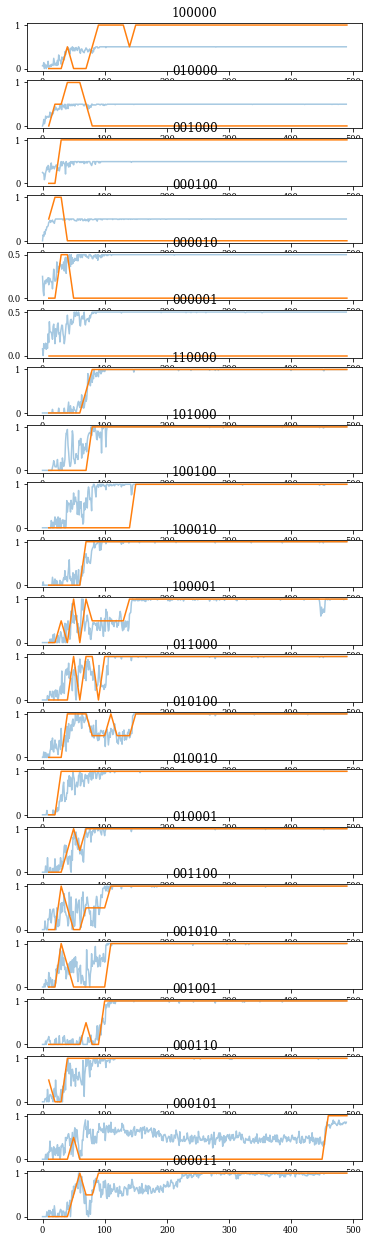

In [141]:

plt.figure(figsize=(6, 22))
for gl in range(21):
    
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)

    slice=490

    i = 1
    n_exp = len(results)




    for label, result in results[str(gl)].items():
        print(result.keys())
        

        plt.subplot(21,1,gl+1)
        plt.plot( result["train_reward"][:slice][0],alpha=0.4,label=label)
        plt.plot(np.arange(10,slice+10,10),list_align_big[gl][0][:slice//10])
        plt.title(goal)
if gl == 15:
    plt.legend()
    plt.grid()
    plt.xlabel("Timesteps")
    plt.ylabel("Rewards")



plt.show()


# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x', 'eval_x'])
dict_keys(['eval_reward', 'train_reward', 'episode_len', 'alignment', 'train_x',

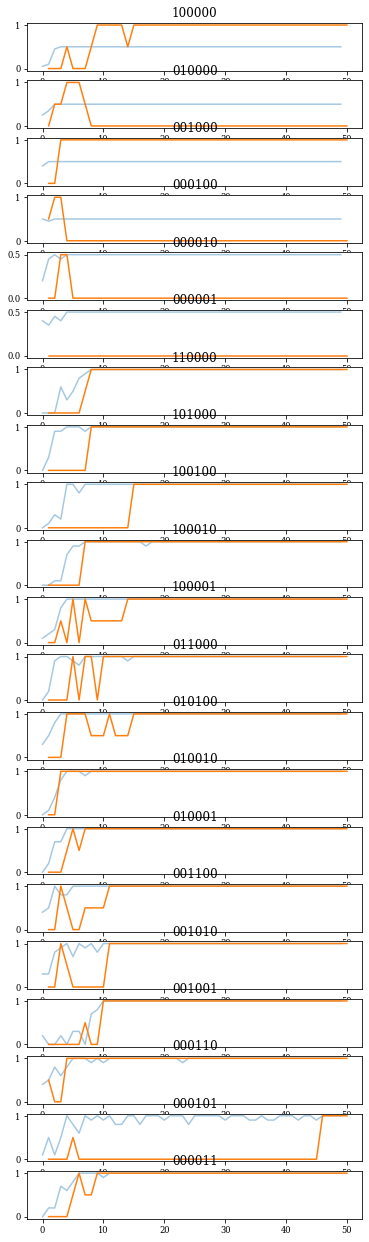

In [142]:

plt.figure(figsize=(6, 22))
for gl in range(21):
    
    goal=""
    for b in goals[gl]:
        goal=goal+str(b)

    slice=50

    i = 1
    n_exp = len(results)




    for label, result in results[str(gl)].items():
        print(result.keys())
        
        
        plt.subplot(21,1,gl+1)
        plt.plot( result["eval_reward"][:slice][0],alpha=0.4,label=label)
        plt.plot(np.arange(1,slice+1),list_align_big[gl][0][:slice])
        plt.title(goal)
if gl == 15:
    plt.legend()
    plt.grid()
    plt.xlabel("Timesteps")
    plt.ylabel("Rewards")






# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

In [143]:
# time to reach collective goal